In [49]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
import geopy.distance
geolocator = Nominatim(user_agent="User")
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [7]:
file_list

['../data/raw\\1_2024-05-19_19-28.csv',
 '../data/raw\\2_2024-05-19_19-29.csv',
 '../data/raw\\3_2024-05-19_19-29.csv',
 '../data/raw\\1_2024-06-10_19-21.csv',
 '../data/raw\\2_2024-06-10_19-21.csv',
 '../data/raw\\3_2024-06-10_19-22.csv']

In [57]:
main_dataframe = pd.read_csv(file_list[0], delimiter=';')
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i], delimiter=';') 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])

df = main_dataframe

df['district'].fillna('', inplace=True)

df['first_floor'] = df['floor'] == 1
df['last_floor'] = df['floor'] == df['floors_count']

df['address_flat'] = "Москва, " + df['district'] + ', ' + df['street'] + ', ' + df['house_number']
df['station'] = 'Москва, станция ' + df['underground']

def calculate_distance(loc1, loc2):
    location1 = geolocator.geocode(loc1)
    location2 = geolocator.geocode(loc2)
    try:    
       coords_1 = (location1.latitude, location1.longitude)
       coords_2 = (location2.latitude, location2.longitude)
       return geopy.distance.geodesic(coords_1, coords_2).km
    except:
        np.nan

df['distance_station'] = df.apply(lambda row: calculate_distance(row['address_flat'], row['station']), axis=1)
df['distance_center'] = df.apply(lambda row: calculate_distance(row['address_flat'], 'Москва, Красная Площадь, 1'), axis=1)

df.head(5)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,house_number,underground,residential_complex,url_id,first_floor,last_floor,address_flat,station,distance_station,distance_center
0,Whitewill Москва-Сити,real_estate_agent,https://www.cian.ru/sale/flat/297087850/,Москва,sale,flat,51,75,1,123.0,...,15,Деловой центр,Меркурий Тауэр,297087850,False,False,"Москва, Пресненский, 1-й Красногвардейский про...","Москва, станция Деловой центр",NaN,4.958168
1,Whitewill Москва-Сити,real_estate_agent,https://www.cian.ru/sale/flat/299330003/,Москва,sale,flat,63,66,1,86.0,...,22,Деловой центр,NEVA TOWERS,299330003,False,False,"Москва, Пресненский, 1-й Красногвардейский про...","Москва, станция Деловой центр",NaN,5.324118
2,SITRealty,real_estate_agent,https://www.cian.ru/sale/flat/300609717/,Москва,sale,flat,4,7,1,40.0,...,2,Санино,Баркли Медовая долина,300609717,False,False,"Москва, , Медовая Долина, 2","Москва, станция Санино",NaN,36.291963
3,ID 85493597,homeowner,https://www.cian.ru/sale/flat/291715624/,Москва,sale,flat,2,15,1,34.3,...,28К1,Бульвар Дмитрия Донского,NaN,291715624,False,False,"Москва, Северное Бутово, Грина, 28К1","Москва, станция Бульвар Дмитрия Донского",NaN,21.038922
4,ГОРОДА,real_estate_agent,https://www.cian.ru/sale/flat/302138352/,Москва,sale,flat,6,22,1,38.8,...,19,Свиблово,NaN,302138352,False,False,"Москва, Свиблово, Игарский проезд, 19","Москва, станция Свиблово",1.064141,11.465237


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 55
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               328 non-null    object 
 1   author_type          328 non-null    object 
 2   url                  328 non-null    object 
 3   location             328 non-null    object 
 4   deal_type            328 non-null    object 
 5   accommodation_type   328 non-null    object 
 6   floor                328 non-null    int64  
 7   floors_count         328 non-null    int64  
 8   rooms_count          328 non-null    int64  
 9   total_meters         328 non-null    float64
 10  price                328 non-null    int64  
 11  district             328 non-null    object 
 12  street               324 non-null    object 
 13  house_number         324 non-null    object 
 14  underground          325 non-null    object 
 15  residential_complex  183 non-null    object 
 

In [60]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])

new_dataframe = main_dataframe[['url_id',
                        'total_meters',
                        'first_floor',
                        'last_floor',
                        'floors_count',
                        'rooms_count',
                        'distance_station',
                        'distance_center',
                        'price']].set_index('url_id')

In [51]:
from geopy.geocoders import Nominatim
import geopy.distance
geolocator = Nominatim(user_agent="Tester")
location1 = geolocator.geocode("Москва, Пресненский, 1-й Красногвардейский проезд, 15")
location2 = geolocator.geocode("Москва, станция Свиблово")
coords_1 = (location1.latitude, location1.longitude)
coords_2 = (location2.latitude, location2.longitude)
print(geopy.distance.geodesic(coords_1, coords_2).km)

13.515968362911304


In [54]:
location2 = geolocator.geocode("Москва, Красная Площадь, 1")
print(location2)

Исторический музей, 1, Красная площадь, 15, Китай-город, Тверской район, Москва, Центральный федеральный округ, 109012, Россия


In [61]:
new_dataframe.head()

,total_meters,first_floor,last_floor,floors_count,rooms_count,distance_station,distance_center,price
url_id,,,,,,,,
297087850,123.0,False,False,75,1,NaN,4.958168,99000000
299330003,86.0,False,False,66,1,NaN,5.324118,96000000
300609717,40.0,False,False,7,1,NaN,36.291963,9850000
291715624,34.3,False,False,15,1,NaN,21.038922,10900000
302138352,38.8,False,False,22,1,1.064141,11.465237,14000000


In [41]:
new_df = new_dataframe[new_dataframe['price'] < 30_000_000]

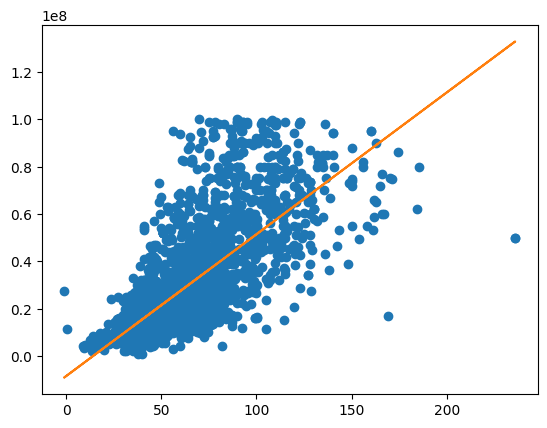

In [42]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)